# Setup
## Download the test data and model weights

In [6]:
from download import download

print("Setting up test data and model weights")
download()

Setting up test data and model weights
--------------------------------------------


downloading: 210it [00:00, 375.13it/s]


Archive:  test_data.zip
   creating: ./test_data/
  inflating: ./test_data/labels.csv  
   creating: ./test_data/zips/
 extracting: ./test_data/zips/x000002.zip  
 extracting: ./test_data/zips/x000003.zip  
 extracting: ./test_data/zips/x000001.zip  
   creating: ./test_data/masks/
  inflating: ./test_data/masks/x000001.npy  
  inflating: ./test_data/masks/x000003.npy  
  inflating: ./test_data/masks/x000002.npy  
--------------------------------------------


downloading: 16794it [00:39, 421.25it/s]


## Set up dataloader

In [1]:
from dataset import UKBB_MRI_LAX_4Ch

root_dir = "test_data"
csv_data = f"{root_dir}/labels.csv"
image_dir = f"{root_dir}/zips"
mask_dir = f"{root_dir}/masks"

dataset = UKBB_MRI_LAX_4Ch(root_dir, csv_data, image_dir,mask_dir,
                           image_format="zip")

## Initialize the segmentation model with weights

In [2]:
import torch
from models import UNetModule

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Device {device} is used.")

model = UNetModule(num_classes=5)
weights = torch.load("weights/UNetModule.pt", map_location='cpu')
model.load_state_dict(weights['model_state'])
print("model is loaded")

Device cpu is used.
model is loaded


## Use the model to run segmentation on the test data images

In [3]:
import numpy as np

images = dataset[1][0]
preds = model(torch.tensor(images).float())
masks = np.argmax(preds.detach().cpu().numpy(), axis=1)
print("The second test data is used (x000002.zip)")
print(f"The images shape: {images.shape}, the masks shape: {masks.shape}")

The second test data is used (x000002.zip)
The images shape: (50, 3, 256, 256), the masks shape: (50, 256, 256)


## Visualize the segmentation masks

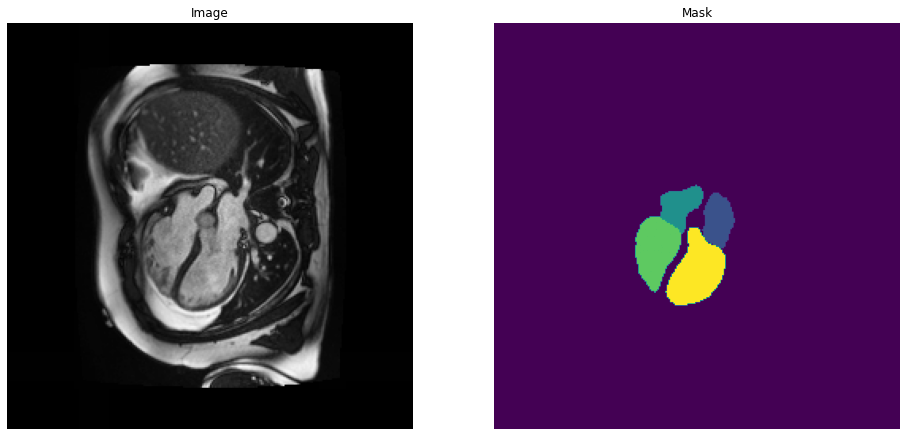

Displaying the image and mask from frame 48


In [4]:
from utils import display_pair

np.random.seed(1234)
idx = np.random.randint(50)

display_pair(images[idx], masks[idx])
print(f"Displaying the image and mask from frame {idx+1}")

## Measure the segmentation masks and output the measurements

/Users/kexiao/Documents/Github/ukbb_lax_4ch_segmentation/measurements/image.py:77: FutureWarning: The behavior of rgb2gray will change in scikit-image 0.19. Currently, rgb2gray allows 2D grayscale image to be passed as inputs and leaves them unmodified as outputs. Starting from version 0.19, 2D arrays will be treated as 1D images with 3 channels.
  image = rgb2gray(image)


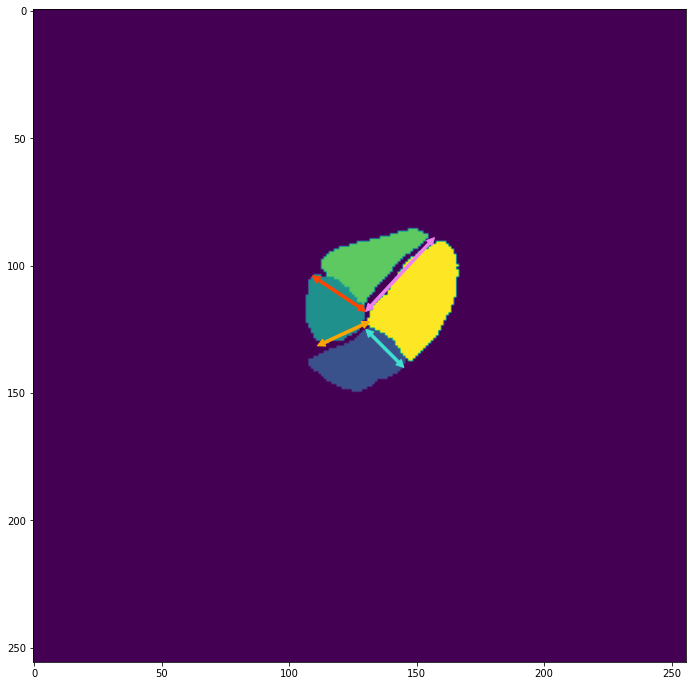

In [5]:
from measurements.measure_4ch import get_measurements
from measurements.measure_4ch import get_measurement_images
from measurements.measure_4ch import process_mask_methods
from utils.filepath import secure_folder

pid = "x000001"
mask_dir = "test_data/masks"
zip_dir = "test_data/zips"
out_dir = "outputs/csvs"
fig_dir = "outputs/figs"
secure_folder(out_dir)
secure_folder(fig_dir)

df = get_measurements(pid, process_mask_methods[1], 
                      mask_dir=mask_dir, zip_dir=zip_dir,
                      out_dir=out_dir)

np.random.seed(123)
frame = np.random.randint(50)
get_measurement_images(f"{pid}_{frame}", process_mask_methods[1], 
                        mask_dir=mask_dir, zip_dir=zip_dir,
                        fig_dir=fig_dir)

## Display the measurement and the segmentation

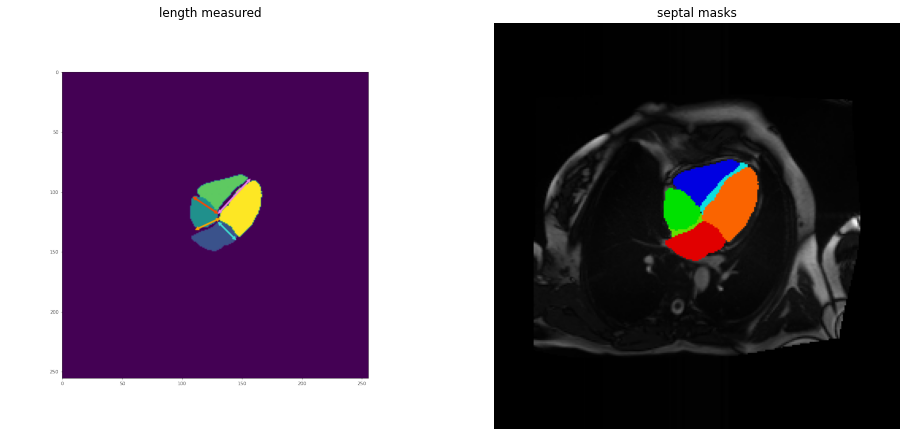

In [6]:
from imageio import imread

length_fig = imread(f"{fig_dir}/{pid}_F{frame}_length.png")
septal_fig = imread(f"{fig_dir}/{pid}_F{frame}_septal_masked.png")

display_pair(length_fig, septal_fig, "length measured", "septal masks")

## Display the measurements dataframe/csv

In [7]:
df

,AtrSepMass,VenSepMass,AtrSepLen,VenSepLen,MitAnnLen,TriAnnLen
0,66.752963,367.141294,6.587065,73.014098,36.263389,3.653846
1,323.751869,337.102461,44.619582,73.679608,36.538463,38.408859
2,243.648313,347.115406,39.236338,74.350385,36.992374,42.610804
3,277.024795,347.115406,41.277953,73.128289,35.472431,44.187376
4,277.024795,343.777757,41.740296,70.549754,35.472431,46.109455
5,303.725980,380.491887,45.755216,75.104097,36.263389,47.147361
6,263.674202,390.504831,44.149592,72.446199,36.538463,45.379829
7,220.284777,417.206016,44.121234,72.526777,38.015808,43.998135
8,233.635369,450.582498,44.982765,71.156252,38.840919,46.577583
9,200.258888,460.595442,42.893805,71.156252,39.097862,47.815154
